Dataset
Focused on movie revenue and analyze it over the last decades.
There are more factors that intervene in this kind of thing, like actors, genres, user ratings and more.

Content
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

Budget: the budget of a movie. Some movies don't have this, so it appears as 0
Company: the production company
Country: country of origin
Director: the director
Genre: main genre of the movie.
Gross: revenue of the movie
Name: name of the movie
Rating: rating of the movie (R, PG, etc.)
Released: release date (YYYY-MM-DD)
Runtime: duration of the movie
Score: IMDb user rating
Votes: number of user votes
Star: main actor/actress
Writer: writer of the movie
Year: year of release

This data was scraped from IMDb.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy.stats import mode
from wordcloud import WordCloud
from collections import Counter
from prettytable import PrettyTable

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# Reading the data

df = pd.read_csv(r'C:\Users\jchpa\Downloads\movies.csv')

In [2]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
df.shape

(7668, 15)

In [4]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
#         We can see by df.info(), that data is missing

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

      We could get it individually, coding
    
print(df['budget'].isnull().sum()) # count of NaN values in the budget column 
print(df['gross'].isnull().sum()) # count of NaN values in the gross column 
print(df['rating'].isnull().sum()) # count of NaN values in the budget column 

etc...

In [7]:
# Get the name of column, sum of null, and data type of each column with NULL data 

# Create list with NULL Data into Column
null_cols = df.columns[df.isnull().any()].tolist() 
null_info = []
for col in null_cols:
    null_info.append([col, df[col].isnull().sum(), df[col].dtype])

# Create a DataFrame from the null information
null_df = pd.DataFrame(null_info, columns=['Column Name', 'Sum of Null', 'Data Type'])

# Print the null information table
print(null_df)

   Column Name  Sum of Null Data Type
0       rating           77    object
1     released            2    object
2        score            3   float64
3        votes            3   float64
4       writer            3    object
5         star            1    object
6      country            3    object
7       budget         2171   float64
8        gross          189   float64
9      company           17    object
10     runtime            4   float64


In [8]:
#   Percent Missing Data

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {:.4f}%'.format(col,pct_missing))

name - 0.0000%
rating - 0.0100%
genre - 0.0000%
year - 0.0000%
released - 0.0003%
score - 0.0004%
votes - 0.0004%
director - 0.0000%
writer - 0.0004%
star - 0.0001%
country - 0.0004%
budget - 0.2831%
gross - 0.0246%
company - 0.0022%
runtime - 0.0005%


In [10]:
# Data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#  Shows every rows and columns with NaN values
print(df.loc[df.isnull().any(axis=1)].head(10))

                        name rating   genre  year  \
16                      Fame      R   Drama  1980   
19                Stir Crazy      R  Comedy  1980   
24              Urban Cowboy     PG   Drama  1980   
25            Altered States      R  Horror  1980   
26           Little Darlings      R  Comedy  1980   
27         Raise the Titanic     PG  Action  1980   
30              My Bodyguard     PG  Comedy  1980   
31                Prom Night      R  Horror  1980   
32  Smokey and the Bandit II     PG  Action  1980   
34      Seems Like Old Times     PG  Comedy  1980   

                              released  score    votes        director  \
16        May 16, 1980 (United States)    6.6  21000.0     Alan Parker   
19   December 12, 1980 (United States)    6.8  26000.0  Sidney Poitier   
24        June 6, 1980 (United States)    6.4  14000.0   James Bridges   
25   December 25, 1980 (United States)    6.9  33000.0     Ken Russell   
26      March 21, 1980 (United States)    6.5 

In [12]:
#   WE CAN DELETE ROWS WITH DATA NULL OR COMPLETE DATA NULL WITH MODE & MEDIAN

############################################################################

#
# Delete rows with Data NULL
# df = df.dropna()


# Replace NULL VALUES with mode for object & median for int/float
def replace_null_values(dataframe):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            #mode_value = mode(dataframe[col], axis =0, keepdims= True).mode[0]
            mode_value = dataframe[col].mode().iloc[0]
            dataframe[col].fillna(mode_value, inplace=True)
        else:
            median_value = np.nanmedian(dataframe[col])
            dataframe[col].fillna(median_value, inplace=True)
    return dataframe

In [13]:
#  Calling Funtion replace NaN values

replace_null_values(df)




,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Universal Pictures,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,104.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Universal Pictures,120.0


In [14]:
#  NaN values were replaced successfully
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [15]:
# Not duplicated Data

df.duplicated().sum()

0

We could change Data type using:
    
    df['budget'] = df['budget'].astype(float64).round(2)
    df['gross'] = df['gross'].astype(float64).round(2)

In [16]:
# Some data into year column are diff to released column.
# Let's extract year from released column to compare it 

df['year_correct'] = df['released'].str.split(',').str[1].str[:5]

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [18]:
# But we get NAN data into new year_correc column

df.year_correct.isnull().sum()

57

In [19]:
replace_null_values(df)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Universal Pictures,90.0,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,104.0,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Universal Pictures,120.0,2020


In [20]:
df.year_correct.isnull().sum()

0

In [21]:
df.sort_values(by='gross', ascending = False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0,2019


In [22]:
#  Showing distinct companies 

df['company'].drop_duplicates().sort_values(ascending=True)

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3748                     1+2 Seisaku Iinkai
5813                        10 West Studios
                       ...                 
6793                             i am OTHER
4007                               i5 Films
6412               iDeal Partners Film Fund
5664                            micro_scope
7129                                thefyzz
Name: company, Length: 2385, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

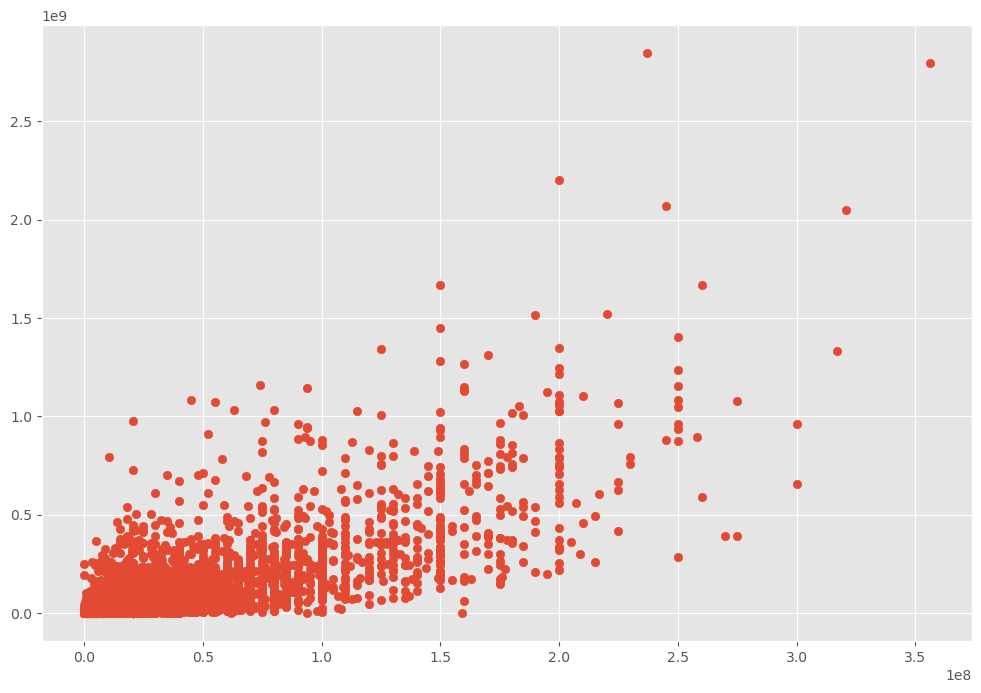

In [23]:
#   Graph budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

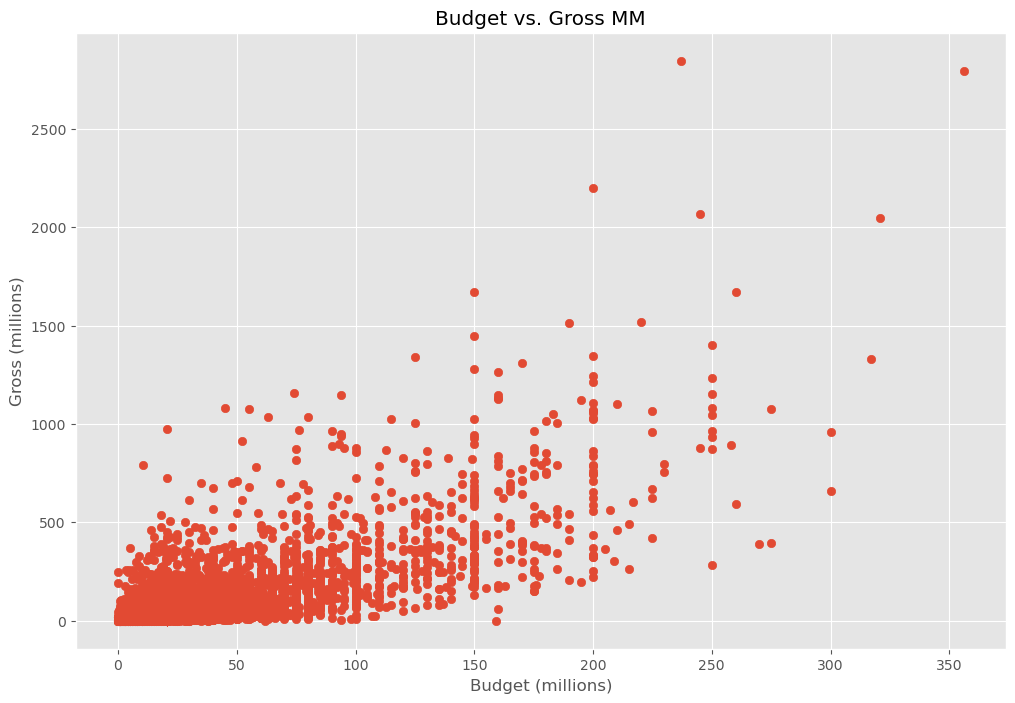

In [24]:
#   Graph budget vs gross MM
# Convert 'budget' and 'gross' to millions

df['BudgetMM'] = df['budget']/1000000
df['GrossMM'] = df['gross']/1000000

plt.scatter(x=df['BudgetMM'],y=df['GrossMM'])

# Add titles and labels
plt.title('Budget vs. Gross MM')
plt.xlabel('Budget (millions)')
plt.ylabel('Gross (millions)')

plt.show

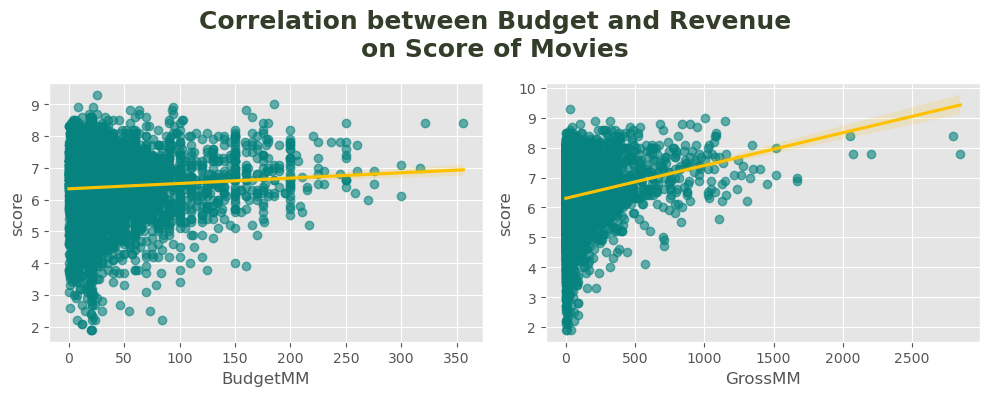

In [25]:
df_plot = df[(df['BudgetMM'] != 0) & (df['GrossMM'] != 0)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Correlation between Budget and Revenue\non Score of Movies', fontsize=18, weight=600, color='#333d29')
for i, col in enumerate(['BudgetMM', 'GrossMM']):
    sns.regplot(data=df_plot, x=col, y='score',
                scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()

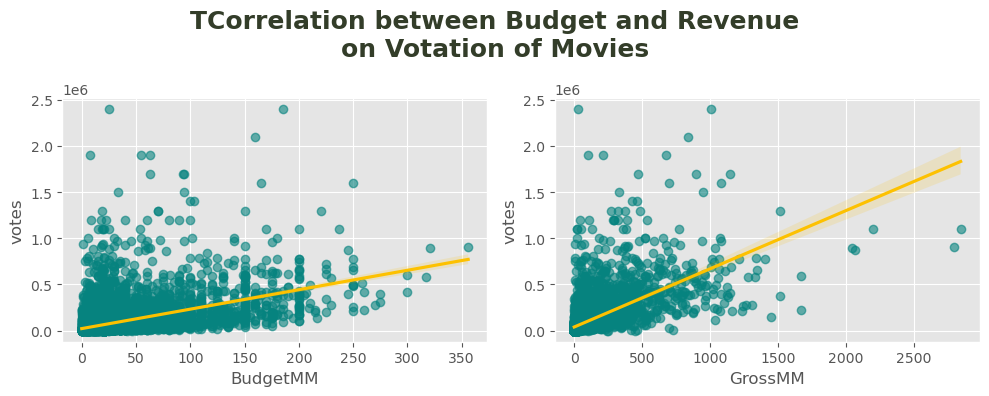

In [26]:
df_plot = df[(df['BudgetMM'] != 0) & (df['GrossMM'] != 0)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('TCorrelation between Budget and Revenue\non Votation of Movies', fontsize=18, weight=600, color='#333d29')
for i, col in enumerate(['BudgetMM', 'GrossMM']):
    sns.regplot(data=df_plot, x=col, y=('votes'),
                scatter_kws={"color": "#06837f", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()

In [27]:
# Calculating Proportion(ROI)

df['Proportion']= df['GrossMM']/df['BudgetMM']

print(df[['name','Proportion']].sort_values(by='Proportion',ascending=False).round(2).head(20))

                                   name  Proportion
5114                Paranormal Activity    12890.39
471         A Polish Vampire in Burbank     6735.25
3459            The Blair Witch Project     4143.98
7658          Black Wall Street Burning     4041.15
7663                       More to Life     2886.54
327                       Boardinghouse     2020.58
7662                      The Robinsons     2020.58
7666                       It's Just Us     1347.05
2222                    Laws of Gravity      531.73
6815                        The Gallows      429.64
7665                      Saving Mbango      343.93
2093                        El Mariachi      291.56
1578             The Unbelievable Truth      269.41
1184                        Creepozoids      269.41
464                          White Star      202.06
1183  Silent Night, Deadly Night Part 2      202.06
2196                 Claire of the Moon      155.43
5154                               Once      139.58
2467        

In [28]:
df.sort_values(by='Proportion',ascending=False).round(2).head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,BudgetMM,GrossMM,Proportion
5114,Paranormal Activity,R,Horror,2007,"October 16, 2009 (United States)",6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000.0,193355800.0,Solana Films,86.0,2009,0.02,193.36,12890.39
471,A Polish Vampire in Burbank,Not Rated,Comedy,1983,"October 31, 1983 (United States)",5.0,275.0,Mark Pirro,Mark Pirro,Mark Pirro,United States,3000.0,20205757.0,Pirromount Pictures,80.0,1983,0.00,20.21,6735.25
3459,The Blair Witch Project,R,Horror,1999,"July 30, 1999 (United States)",6.5,239000.0,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000.0,248639099.0,Haxan Films,81.0,1999,0.06,248.64,4143.98
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,20205757.0,Notis Studio,78.0,2020,0.00,20.21,4041.15
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Universal Pictures,90.0,2020,0.01,20.21,2886.54
327,Boardinghouse,R,Comedy,1982,"October 21, 1983 (United States)",3.8,651.0,John Wintergate,John Wintergate,John Wintergate,United States,10000.0,20205757.0,Blustarr,98.0,1983,0.01,20.21,2020.58
7662,The Robinsons,R,Action,2020,"November 10, 2020 (United States)",6.5,33000.0,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,20205757.0,Universal Pictures,90.0,2020,0.01,20.21,2020.58
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Universal Pictures,120.0,2020,0.02,20.21,1347.05
2222,Laws of Gravity,R,Crime,1992,"August 20, 1993 (United Kingdom)",6.8,950.0,Nick Gomez,Nick Gomez,Peter Greene,United States,38000.0,20205757.0,Island World,100.0,1993,0.04,20.21,531.73
6815,The Gallows,R,Horror,2015,"July 10, 2015 (United States)",4.3,20000.0,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000.0,42964410.0,New Line Cinema,81.0,2015,0.10,42.96,429.64


<AxesSubplot:xlabel='BudgetMM', ylabel='GrossMM'>

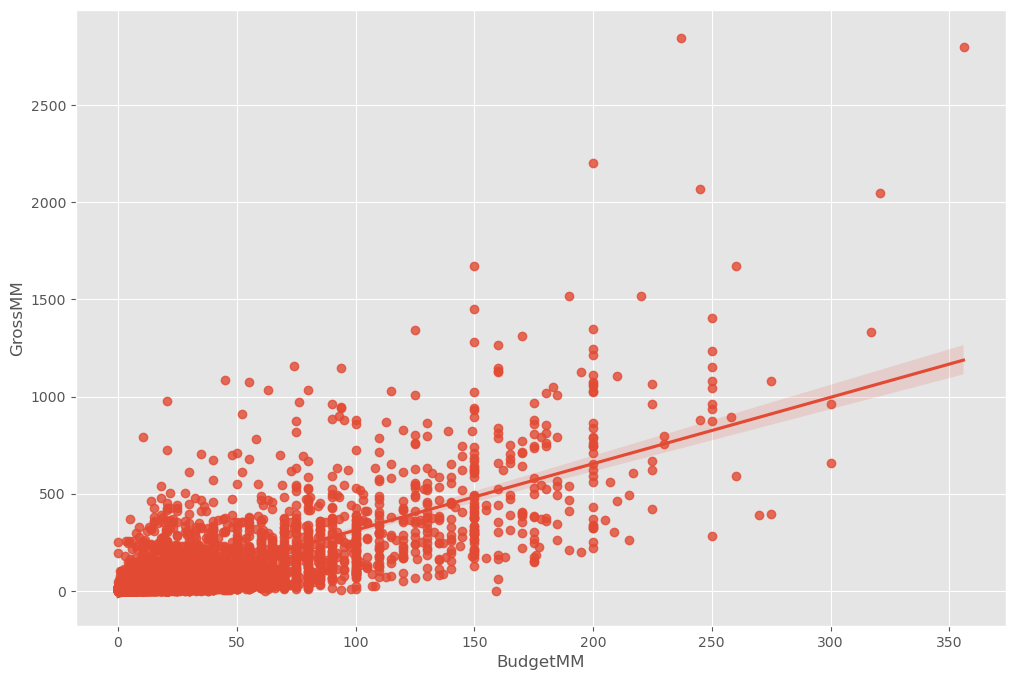

In [29]:
# Using Seaborn

sns.regplot(x='BudgetMM', y='GrossMM', data=df)

<AxesSubplot:xlabel='BudgetMM', ylabel='GrossMM'>

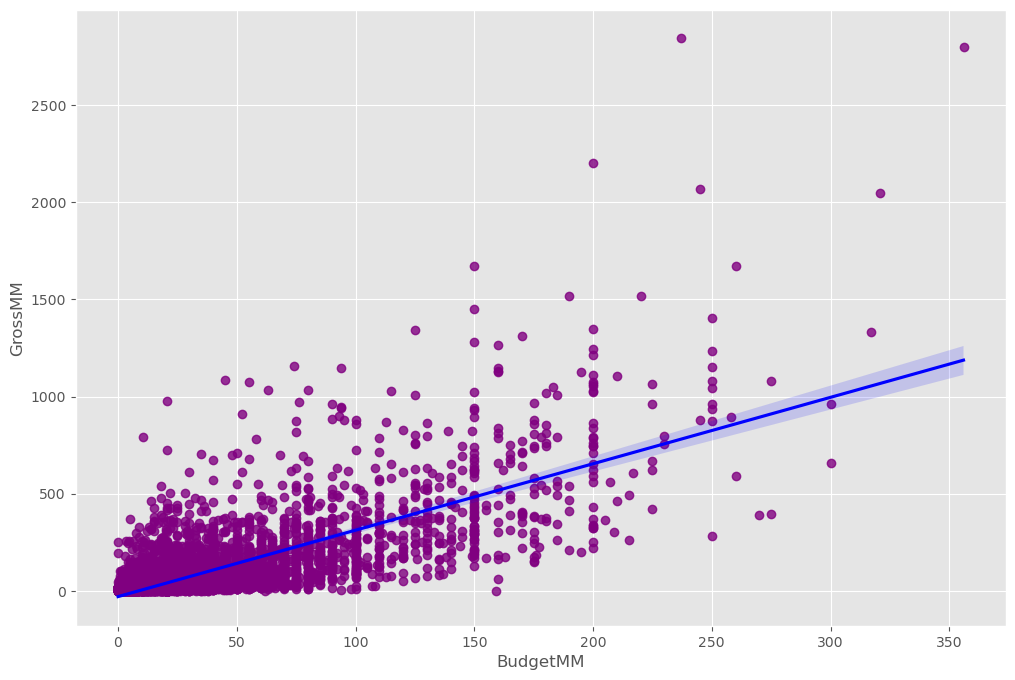

In [30]:
sns.regplot(x='BudgetMM', y='GrossMM', data =df, scatter_kws = {"color":"purple"}, line_kws={"color":"blue"})

In [31]:
# Looking at the companies with the highest average gross revenue

# IS NOT THE SAME ****RevenueperCompany= df.groupby(['company'),'GrossMM']).mean().round(2).reset_index()

RevenueperCompany= df.groupby('company')['GrossMM'].mean().round(2).reset_index()
RevenueperCompany.sort_values('GrossMM', ascending=False).head(10)

,company,GrossMM
1606,Marvel Studios,1255.47
1313,Illumination Entertainment,1097.12
1008,Fairview Entertainment,966.55
304,B24,880.68
294,Avi Arad Productions,856.09
651,Chris Morgan Productions,759.06
1396,Jolie Pas,758.41
721,Coco Cartoon,726.26
1540,Lucasfilm,718.54
1605,Marvel Entertainment,714.42


In [32]:
RevenueperCompany=RevenueperCompany.sort_values('GrossMM', ascending=False).head(10)
RevenueperCompany

,company,GrossMM
1606,Marvel Studios,1255.47
1313,Illumination Entertainment,1097.12
1008,Fairview Entertainment,966.55
304,B24,880.68
294,Avi Arad Productions,856.09
651,Chris Morgan Productions,759.06
1396,Jolie Pas,758.41
721,Coco Cartoon,726.26
1540,Lucasfilm,718.54
1605,Marvel Entertainment,714.42


In [33]:
#  Using PrettyTable

table= PrettyTable()
table.field_names = ["Company", "GrossMM"]

for index, row in RevenueperCompany.iterrows():
    table.add_row([(row['company']),round(row['GrossMM'],2)])
    
print(table)

+----------------------------+---------+
|          Company           | GrossMM |
+----------------------------+---------+
|       Marvel Studios       | 1255.47 |
| Illumination Entertainment | 1097.12 |
|   Fairview Entertainment   |  966.55 |
|            B24             |  880.68 |
|    Avi Arad Productions    |  856.09 |
|  Chris Morgan Productions  |  759.06 |
|         Jolie Pas          |  758.41 |
|        Coco Cartoon        |  726.26 |
|         Lucasfilm          |  718.54 |
|    Marvel Entertainment    |  714.42 |
+----------------------------+---------+


In [34]:
# Looking at the years with the highest average gross revenue per film

GrossperYear = df.groupby('year_correct')['GrossMM'].mean().round(2).reset_index()
GrossperYear.sort_values('GrossMM', ascending=False).head(10)

,year_correct,GrossMM
37,2017,146.86
36,2016,140.29
38,2018,139.34
32,2012,134.53
35,2015,130.92
33,2013,130.21
34,2014,128.39
29,2009,126.98
30,2010,121.37
31,2011,115.50


In [35]:
GrossperYear = df.groupby('year_correct')['GrossMM'].mean().round(2).reset_index()
GrossperYear.sort_values('GrossMM').head(10)

,year_correct,GrossMM
6,1986,19.46
3,1983,21.17
5,1985,21.47
7,1987,22.32
4,1984,23.80
1,1981,24.27
8,1988,25.77
2,1982,28.11
0,1980,31.02
9,1989,31.25


In [36]:
# In this case df is neither sorted nor limited

table=PrettyTable()
table.field_names = ["Year", "GrossMM"]

for index, row in GrossperYear.iterrows():
    table.add_row([(row['year_correct']),round(row['GrossMM'],2)])
    
print(table)

+-------+---------+
|  Year | GrossMM |
+-------+---------+
|  1980 |  31.02  |
|  1981 |  24.27  |
|  1982 |  28.11  |
|  1983 |  21.17  |
|  1984 |   23.8  |
|  1985 |  21.47  |
|  1986 |  19.46  |
|  1987 |  22.32  |
|  1988 |  25.77  |
|  1989 |  31.25  |
|  1990 |  37.81  |
|  1991 |   32.9  |
|  1992 |  39.71  |
|  1993 |  39.06  |
|  1994 |  46.81  |
|  1995 |  46.09  |
|  1996 |  50.58  |
|  1997 |  65.91  |
|  1998 |  53.29  |
|  1999 |  70.12  |
|  2000 |  65.55  |
|  2001 |  74.16  |
|  2002 |  85.94  |
|  2003 |  90.34  |
|  2004 |  95.49  |
|  2005 |  90.31  |
|  2006 |  93.34  |
|  2007 |  99.15  |
|  2008 |  102.68 |
|  2009 |  126.98 |
|  2010 |  121.37 |
|  2011 |  115.5  |
|  2012 |  134.53 |
|  2013 |  130.21 |
|  2014 |  128.39 |
|  2015 |  130.92 |
|  2016 |  140.29 |
|  2017 |  146.86 |
|  2018 |  139.34 |
|  2019 |  107.3  |
|  2020 |  114.35 |
+-------+---------+


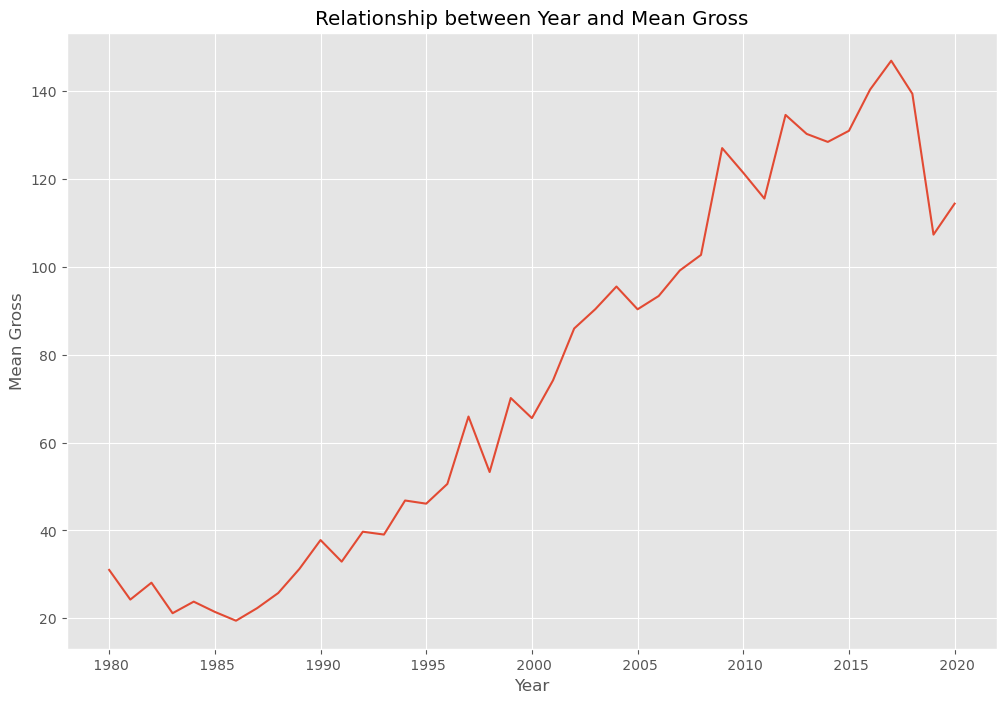

In [37]:
# Plot the relationship between year and mean gross
GrossperYear = df.groupby('year_correct')['GrossMM'].mean().round(2).reset_index()
plt.plot(GrossperYear['year_correct'], GrossperYear['GrossMM'])
plt.xlabel('Year')
plt.ylabel('Mean Gross')
plt.title('Relationship between Year and Mean Gross')
#
# Show only every 5th year on the x-axis

plt.xticks(GrossperYear['year_correct'][::5])
plt.show()

In [38]:
GrossperYear=GrossperYear.sort_values(by='GrossMM', ascending=False).head(10)

table=PrettyTable()
table.field_names = ["Year", "GrossMM"]

for index, row in GrossperYear.iterrows():
    table.add_row([(row['year_correct']),round(row['GrossMM'],2)])
    
print(table)

+-------+---------+
|  Year | GrossMM |
+-------+---------+
|  2017 |  146.86 |
|  2016 |  140.29 |
|  2018 |  139.34 |
|  2012 |  134.53 |
|  2015 |  130.92 |
|  2013 |  130.21 |
|  2014 |  128.39 |
|  2009 |  126.98 |
|  2010 |  121.37 |
|  2011 |  115.5  |
+-------+---------+


In [39]:
GrossperRating=df.groupby('rating')['GrossMM'].mean().round(2).reset_index()
GrossperRating=GrossperRating.sort_values('GrossMM',ascending=False).head(10)

table = PrettyTable()
table.field_names = ["Rating", "GrossMM"]

for index, row in GrossperRating.iterrows():
    table.add_row([(row['rating']),(row['GrossMM'])])
    
print(table)

+-----------+---------+
|   Rating  | GrossMM |
+-----------+---------+
|     G     |  141.25 |
|   PG-13   |  129.78 |
|   TV-PG   |  124.32 |
|     PG    |  104.38 |
|   TV-MA   |  79.17  |
|     R     |  41.77  |
|  Approved |  36.57  |
| Not Rated |   18.0  |
|   NC-17   |  10.76  |
|     X     |   8.49  |
+-----------+---------+


Text(0.5, 1.0, 'The Relationship Between Rating and Popularity')

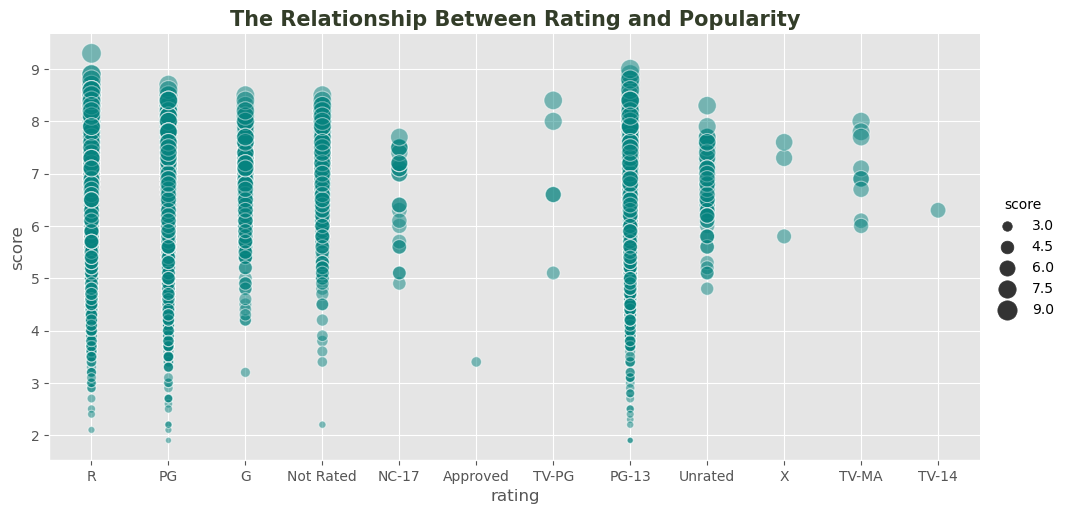

In [40]:
sns.relplot(data=df, x='rating', y='score', size= 'score',
            sizes=(20, 200), alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between Rating and Popularity', fontsize=15, weight=600, color='#333d29')

In [41]:
GrossperGenre = df.groupby('genre')['GrossMM'].mean().round(2).reset_index()
GrossperGenre = GrossperGenre.sort_values('GrossMM',ascending=False).head(10)

table=PrettyTable()
table.field_names=("Genre","GrossMM")

for index, row in GrossperGenre.iterrows():
    table.add_row([row['genre'],row['GrossMM']])

print(table)

+-----------+---------+
|   Genre   | GrossMM |
+-----------+---------+
| Animation |  237.29 |
|   Family  |  196.17 |
|   Action  |  143.16 |
| Adventure |  107.86 |
|  Mystery  |  101.18 |
| Biography |  47.25  |
|   Horror  |  46.11  |
|   Comedy  |  43.76  |
|   Crime   |  39.09  |
|   Drama   |  38.31  |
+-----------+---------+


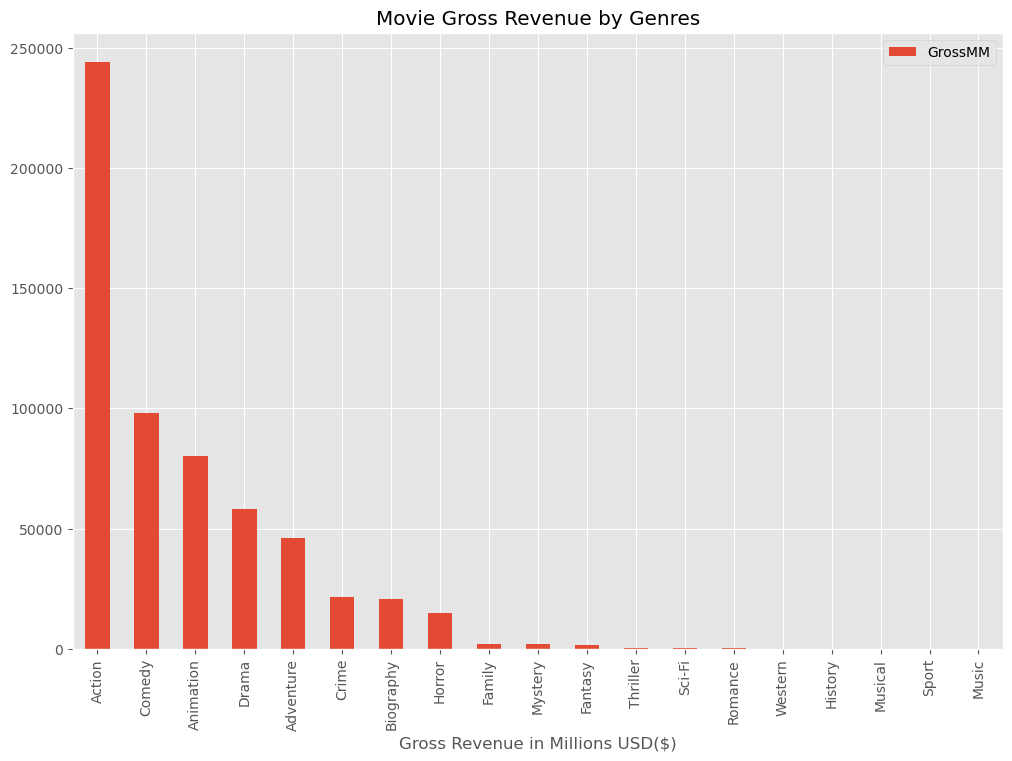

In [42]:
ax = df[['genre','GrossMM']].groupby(['genre']).sum().sort_values(by=['GrossMM'], ascending=False)\
.plot(kind='bar', title = 'Movie Gross Revenue by Genres')

ax.set_xlabel('Gross Revenue in Millions USD($)')
plt.show()

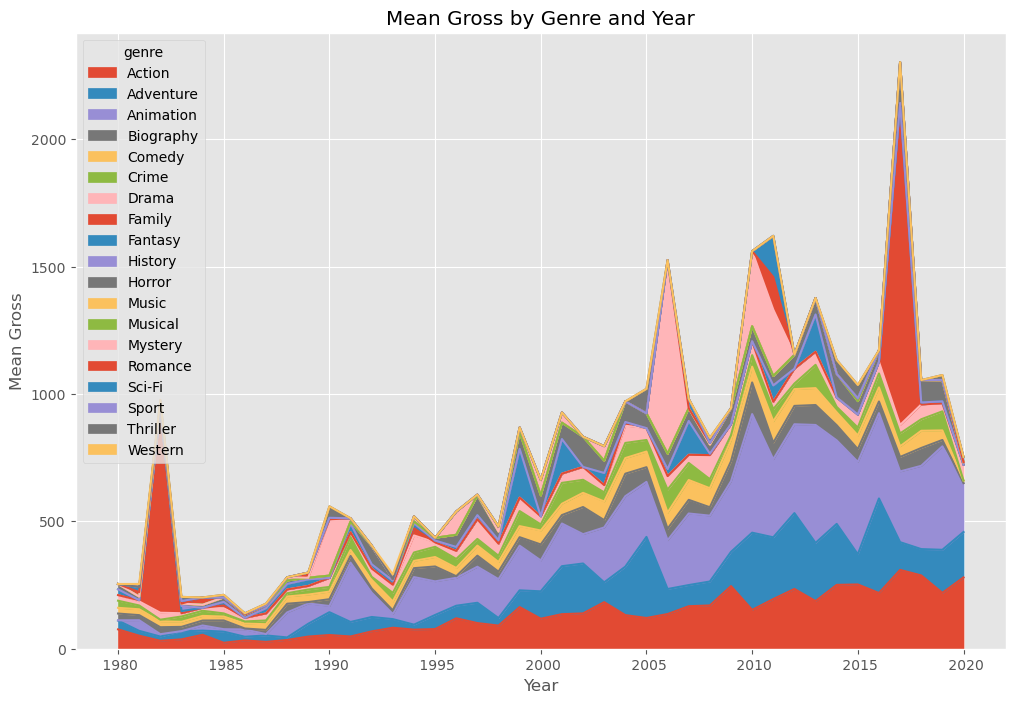

In [43]:
# Calculate the mean gross for each genre and year
genre_year_gross = df.groupby(['genre', 'year_correct'])['GrossMM'].mean().reset_index()

# Pivot the DataFrame to have genre as columns and year as index
genre_year_gross_pivot = genre_year_gross.pivot(index='year_correct', columns='genre', values='GrossMM')

# Visualize the data using an area plot
genre_year_gross_pivot.plot.area(figsize=(12, 8))
plt.title('Mean Gross by Genre and Year')
plt.xlabel('Year')
plt.ylabel('Mean Gross')
plt.show()

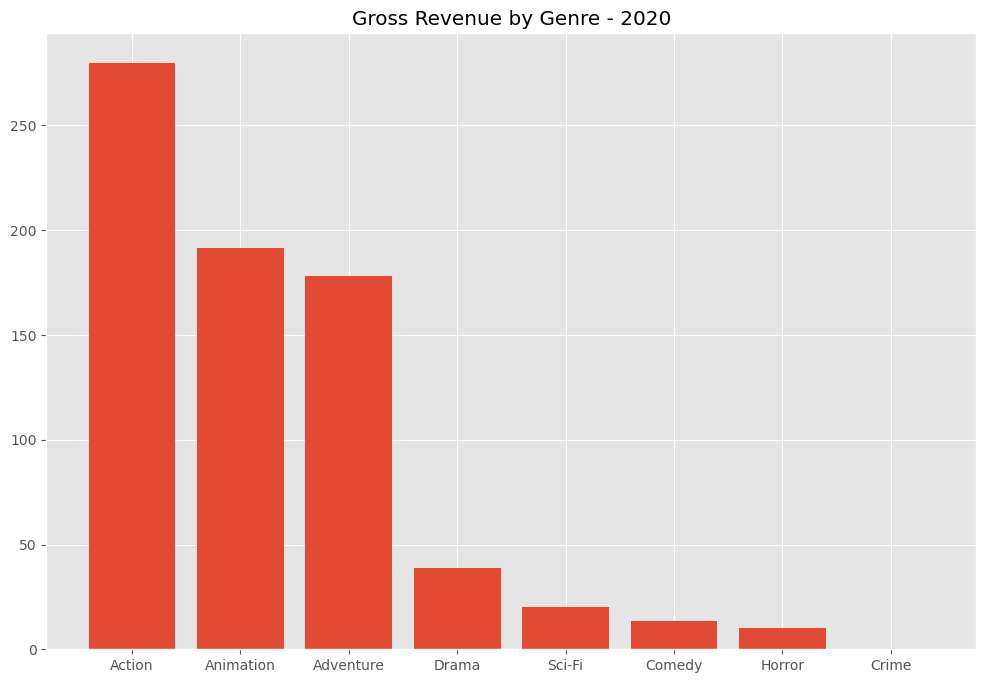

In [44]:
df['year_int']=df['year_correct'].astype(int)

df_2020 = df.loc[df['year'] == 2020]

GrossperGenre = df_2020.groupby('genre')['GrossMM'].mean().round(2).reset_index()
GrossperGenre = GrossperGenre.sort_values('GrossMM',ascending=False).head(10)


plt.bar(GrossperGenre['genre'], GrossperGenre['GrossMM'])
plt.title('Gross Revenue by Genre - 2020')
plt.show()

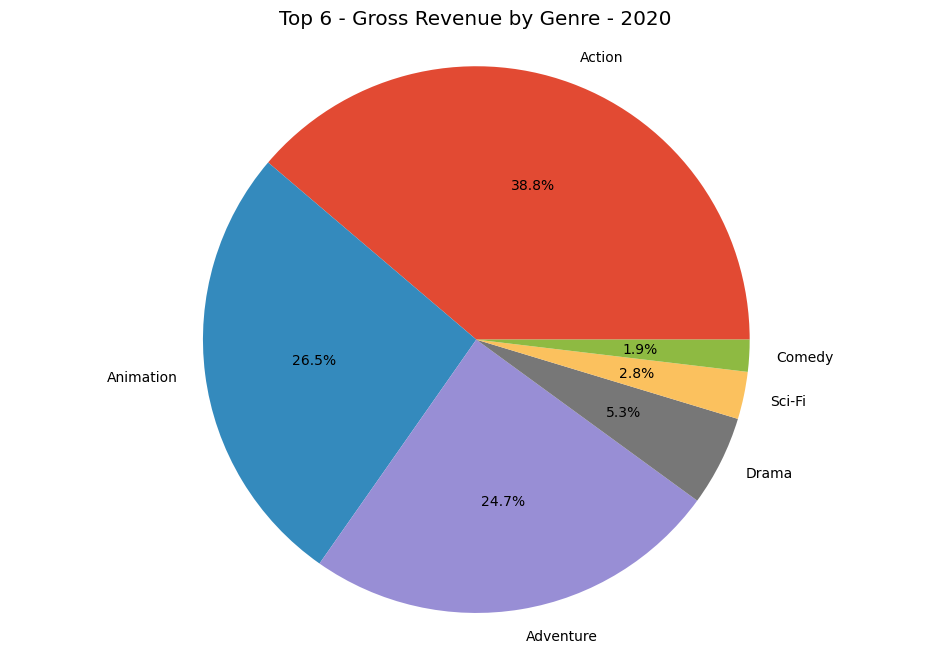

In [45]:

df['year_int']=df['year_correct'].astype(int)

df_2020 = df.loc[df['year'] == 2020]

GrossperGenre = df_2020.groupby('genre')['GrossMM'].mean().round(2).reset_index()
GrossperGenre = GrossperGenre.sort_values('GrossMM',ascending=False).head(6)



plt.pie(GrossperGenre['GrossMM'], labels=GrossperGenre['genre'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 6 - Gross Revenue by Genre - 2020')
plt.show()





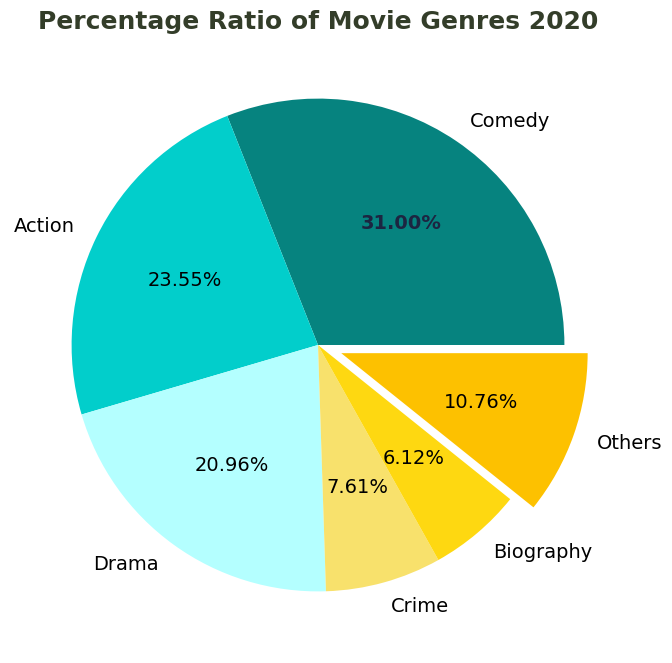

In [46]:
genres_list = []
for i in df['genre']:
    genres_list.extend(i.split(', '))
    
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
    
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total' ])
#df_plot = df.loc[df_plot['year'] == 2020]

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres 2020', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = plt.pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

    plt.show()

In [47]:
# Mean Gross per Star

GrossperGenre = df.groupby('star')['GrossMM'].mean().round(2).reset_index()
GrossperGenre = GrossperGenre.sort_values('GrossMM',ascending=False).head(10)

table=PrettyTable()
table.field_names=("Star","GrossMM")

for index, row in GrossperGenre.iterrows():
    table.add_row([row['star'],row['GrossMM']])

print(table)

+------------------+---------+
|       Star       | GrossMM |
+------------------+---------+
|  Donald Glover   | 1670.73 |
|   Daisy Ridley   | 1120.17 |
|    Neel Sethi    |  966.55 |
| Craig T. Nelson  |  938.12 |
|   Chris Pratt    |  879.74 |
|    Louis C.K.    |  875.46 |
| Anthony Gonzalez |  807.82 |
|    Yanting Lü    |  726.26 |
|   Tom Holland    |  718.02 |
|  Bill Skarsgård  |  701.8  |
+------------------+---------+


In [48]:
# Most Gross per Star

GrossperGenre = df.groupby('star')['GrossMM'].sum().round(2).reset_index()
GrossperGenre = GrossperGenre.sort_values('GrossMM',ascending=False).head(10)

table=PrettyTable()
table.field_names=("Star","GrossMM")

for index, row in GrossperGenre.iterrows():
    table.add_row([row['star'],row['GrossMM']])

print(table)

+-------------------+----------+
|        Star       | GrossMM  |
+-------------------+----------+
| Robert Downey Jr. | 11859.53 |
|     Tom Hanks     | 9952.42  |
|     Tom Cruise    | 9602.55  |
|  Daniel Radcliffe | 7954.06  |
|     Will Smith    | 7947.28  |
|    Johnny Depp    | 7444.24  |
| Leonardo DiCaprio | 6963.37  |
|     Vin Diesel    | 6036.31  |
|   Dwayne Johnson  | 5711.27  |
|    Bruce Willis   | 5318.95  |
+-------------------+----------+


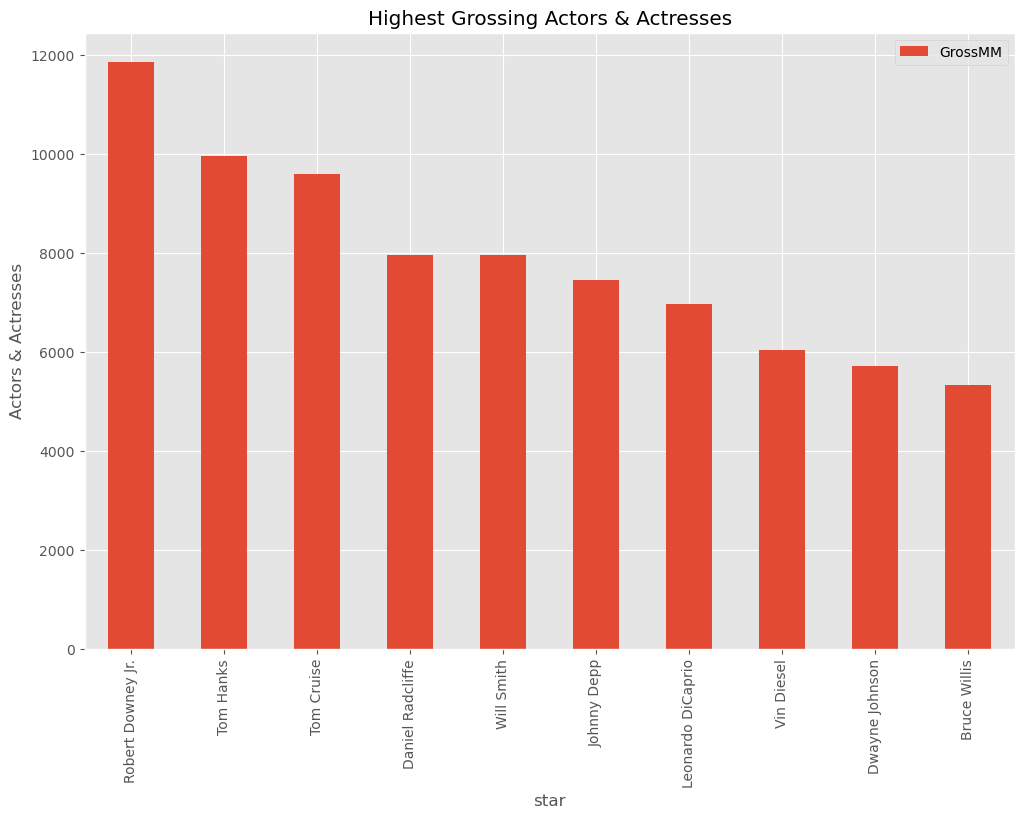

In [49]:
ax = df[['star','GrossMM']].groupby('star').sum().sort_values(by=['GrossMM'], ascending=False).head(10)\
.plot(kind='bar', title='Highest Grossing Actors & Actresses')
ax.set_ylabel('Actors & Actresses')
plt.show()

In [50]:
# Most Gross per Director

GrossperGenre = df.groupby('director')['GrossMM'].sum().round(2).reset_index()
GrossperGenre = GrossperGenre.sort_values('GrossMM',ascending=False).head(10)

table=PrettyTable()
table.field_names=("Director","Sum-GrossMM")

for index, row in GrossperGenre.iterrows():
    table.add_row([row['director'],row['GrossMM']])

print(table)

+-------------------+-------------+
|      Director     | Sum-GrossMM |
+-------------------+-------------+
|  Steven Spielberg |   9629.05   |
|   Anthony Russo   |   6844.25   |
|   Peter Jackson   |   6618.05   |
|    Michael Bay    |   6451.69   |
|   James Cameron   |   6248.09   |
|    David Yates    |   6021.59   |
| Christopher Nolan |   5153.55   |
|    J.J. Abrams    |   4659.38   |
|     Tim Burton    |   4456.35   |
|     Ron Howard    |   4409.19   |
+-------------------+-------------+


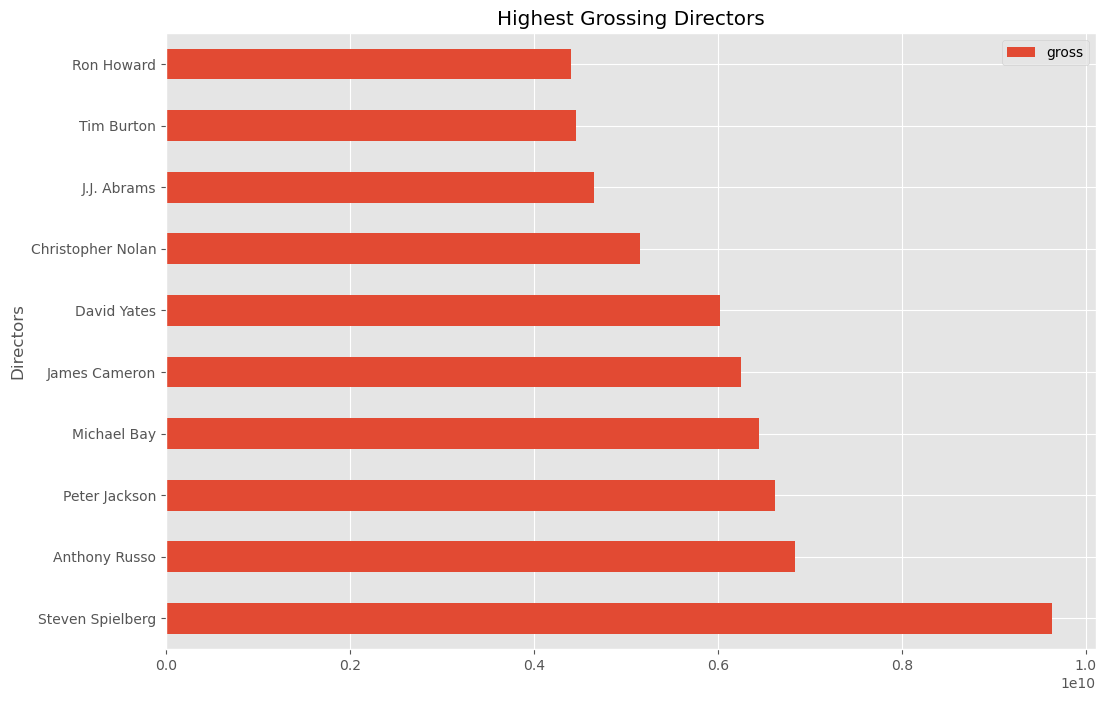

In [51]:
ax = df[['director','gross']].groupby('director')\
.sum().sort_values(by=['gross'], ascending=False).head(10).plot(kind='barh', title='Highest Grossing Directors')
ax.set_ylabel('Directors')
plt.show()

In [52]:
# Most Gross per Director

GrossperGenre = df.groupby('director')['GrossMM'].mean().round(2).reset_index()
GrossperGenre = GrossperGenre.sort_values('GrossMM',ascending=False).head(10)

table=PrettyTable()
table.field_names=("Director","Mean-GrossMM")

for index, row in GrossperGenre.iterrows():
    table.add_row([row['director'],row['GrossMM']])

print(table)

+------------------+--------------+
|     Director     | Mean-GrossMM |
+------------------+--------------+
|  Anthony Russo   |   1368.85    |
|    Kyle Balda    |   1097.12    |
|   Josh Cooley    |   1073.39    |
|    Chris Buck    |   1059.91    |
|   Lee Unkrich    |    937.39    |
|  James Cameron   |    892.58    |
|   David Yates    |    860.23    |
|   George Lucas   |    849.75    |
|   J.J. Abrams    |    776.56    |
| Robert Stromberg |    758.41    |
+------------------+--------------+


In [53]:
# Correlation btw Genre Mean-Score

Correlation = df.groupby('genre')['score'].mean().round(2).reset_index()
Correlation = Correlation.sort_values('score',ascending=False).head(10)

table=PrettyTable()
table.field_names=("Genre","Mean-Score")

for index, row in Correlation.iterrows():
    table.add_row([row['genre'],row['score']])

print(table)

+-----------+------------+
|   Genre   | Mean-Score |
+-----------+------------+
|  History  |    8.3     |
|  Musical  |    8.05    |
|   Music   |    7.2     |
| Biography |    7.03    |
| Animation |    6.77    |
|   Drama   |    6.69    |
|   Crime   |    6.67    |
|  Mystery  |    6.67    |
|  Romance  |    6.41    |
|   Family  |    6.36    |
+-----------+------------+


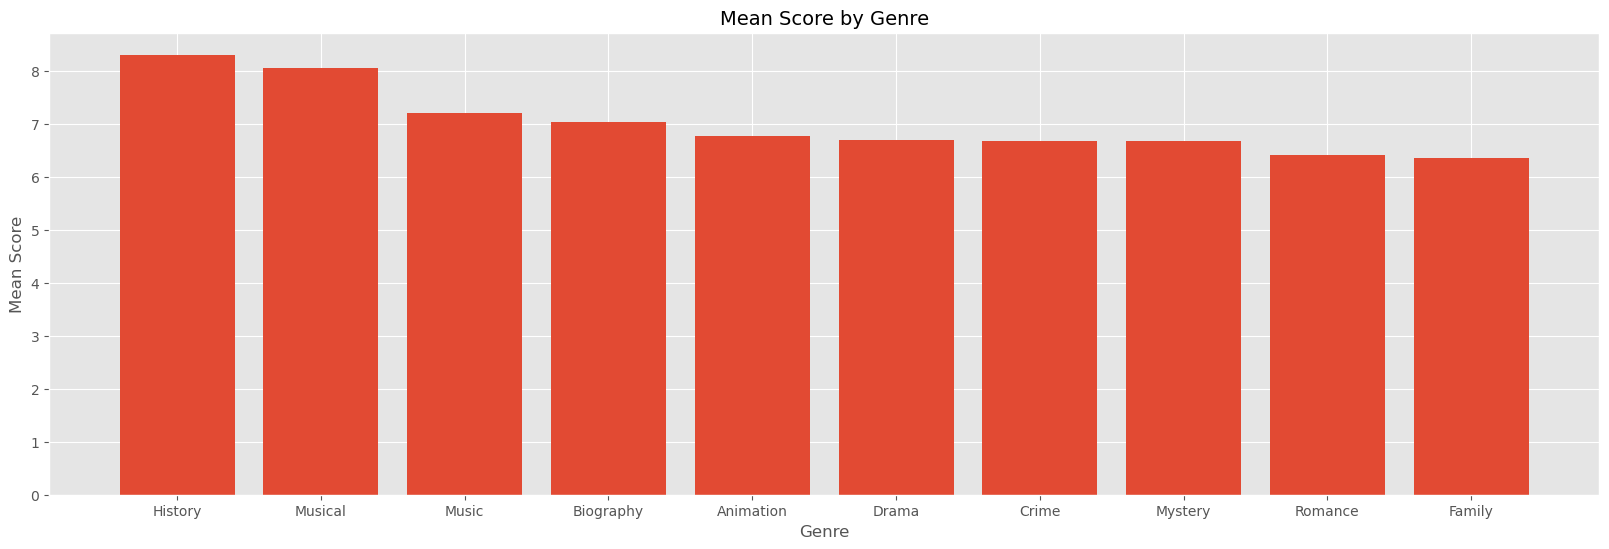

In [54]:
plt.figure(figsize=(20, 6))
plt.bar(Correlation.genre, Correlation.score)
plt.title('Mean Score by Genre', size=14)
plt.xlabel('Genre')
plt.ylabel('Mean Score')
plt.show()

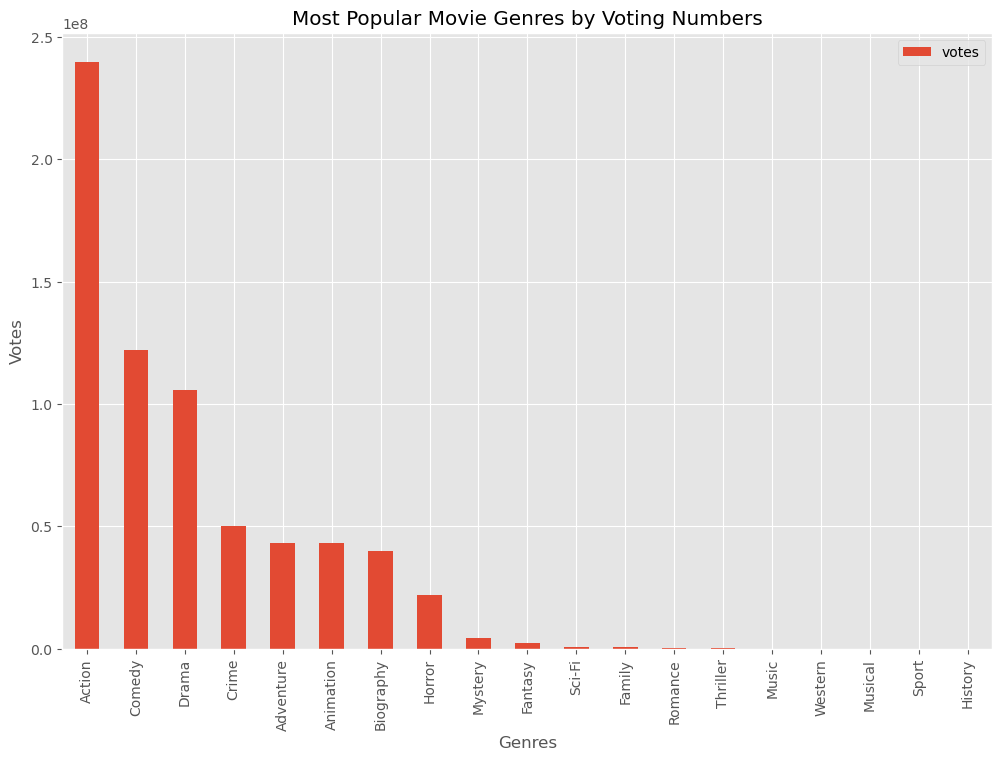

In [55]:
#  Most popular genre by vote


ax = df[['genre','votes']].groupby(['genre']).sum().sort_values(by=['votes'], ascending=False)\
.plot(kind='bar', title = 'Most Popular Movie Genres by Voting Numbers')

ax.set_xlabel('Genres') #labeling the x axis
ax.set_ylabel('Votes')

plt.show()

In [56]:
#Top Grosses Movies

Correlation = df.groupby('name')['GrossMM'].sum().round(2).reset_index()
Correlation = Correlation.sort_values('GrossMM',ascending=False).head(10)

table=PrettyTable()
table.field_names=("Name","Gross-MM")

for index, row in Correlation.iterrows():
    table.add_row([row['name'],row['GrossMM']])

print(table)

+--------------------------------------------+----------+
|                    Name                    | Gross-MM |
+--------------------------------------------+----------+
|                   Avatar                   | 2847.25  |
|             Avengers: Endgame              |  2797.5  |
|               The Lion King                | 2754.45  |
|                  Titanic                   | 2201.65  |
| Star Wars: Episode VII - The Force Awakens | 2069.52  |
|           Avengers: Infinity War           | 2048.36  |
|            Beauty and the Beast            |  1689.4  |
|               Jurassic World               | 1670.52  |
|                  Aladdin                   | 1554.74  |
|                The Avengers                |  1542.2  |
+--------------------------------------------+----------+


In [57]:
# Top Score Movies

Correlation = df.loc[df.score>=8.8][['name','score']].sort_values('score', ascending = False)

table=PrettyTable()
table.field_names=("Name","Score")

for index, row in Correlation.iterrows():
    table.add_row([row['name'],row['score']])

print(table)

+---------------------------------------------------+-------+
|                        Name                       | Score |
+---------------------------------------------------+-------+
|              The Shawshank Redemption             |  9.3  |
|                  The Dark Knight                  |  9.0  |
|                  Schindler's List                 |  8.9  |
|                    Pulp Fiction                   |  8.9  |
|   The Lord of the Rings: The Return of the King   |  8.9  |
|                    Forrest Gump                   |  8.8  |
|                     Fight Club                    |  8.8  |
| The Lord of the Rings: The Fellowship of the Ring |  8.8  |
|                     Inception                     |  8.8  |
+---------------------------------------------------+-------+


In [58]:
# Top Score Movies 2

Correlation = df.loc[df['score'] >= 8.8].groupby('name')['score'].mean().round(1).reset_index()
Correlation = Correlation.sort_values('score',ascending=False).head(10)

table=PrettyTable()
table.field_names=("Name","Score")

for index, row in Correlation.iterrows():
    table.add_row([row['name'],row['score']])

print(table)

+---------------------------------------------------+-------+
|                        Name                       | Score |
+---------------------------------------------------+-------+
|              The Shawshank Redemption             |  9.3  |
|                  The Dark Knight                  |  9.0  |
|                    Pulp Fiction                   |  8.9  |
|                  Schindler's List                 |  8.9  |
|   The Lord of the Rings: The Return of the King   |  8.9  |
|                     Fight Club                    |  8.8  |
|                    Forrest Gump                   |  8.8  |
|                     Inception                     |  8.8  |
| The Lord of the Rings: The Fellowship of the Ring |  8.8  |
+---------------------------------------------------+-------+


In [59]:

#counts = df.groupby('genre').count()['name'].sort_values(ascending=False)
counts = df['genre'].value_counts()
counts

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: genre, dtype: int64

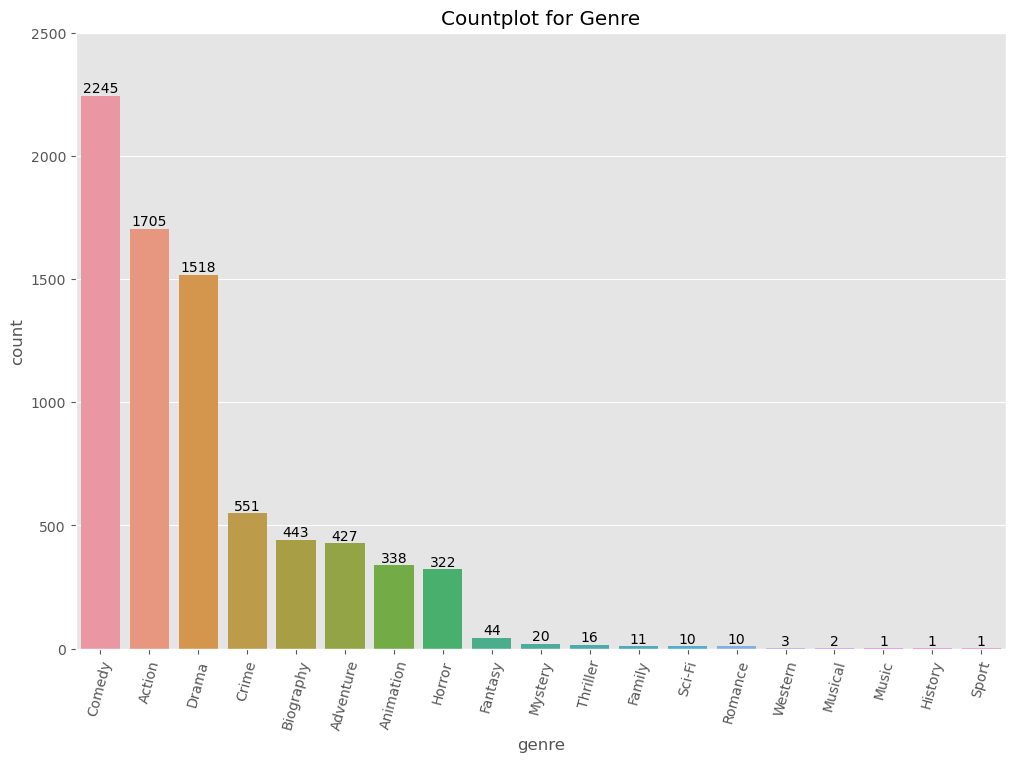

In [60]:
genre_counts = df['genre'].str.split(', ').explode().value_counts()
genre_counts = genre_counts.sort_values(ascending=False)

ax = sns.countplot(x = 'genre',data = df,order=genre_counts.index)
for i in ax.containers:
    plt.bar_label(i)
plt.title('Countplot for Genre')
plt.ylim(0,2500)
plt.xticks(rotation = 75)
plt.show()

(-1.25, 1.25, -1.25, 1.25)

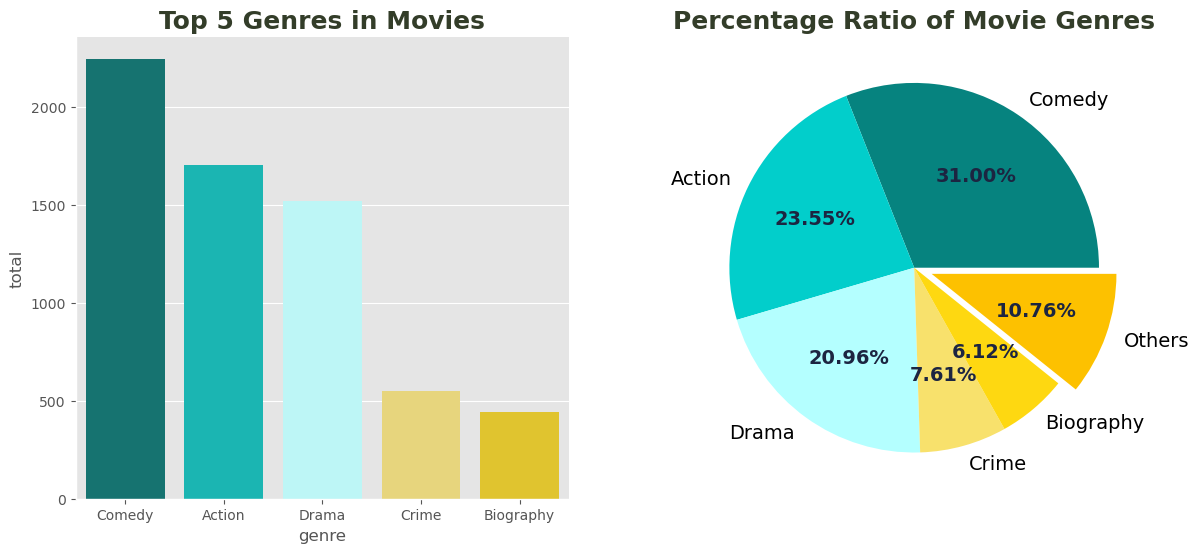

In [61]:
genres_list = []
for i in df['genre']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')

In [62]:
counts = df['star'].value_counts().head(20)
counts

Nicolas Cage             44
Robert De Niro           41
Tom Hanks                41
Denzel Washington        37
Bruce Willis             34
Tom Cruise               34
Johnny Depp              33
Sylvester Stallone       32
John Travolta            31
Mel Gibson               29
Steve Martin             29
Kevin Costner            29
Adam Sandler             28
Ben Stiller              27
Jeff Bridges             27
Keanu Reeves             27
Robin Williams           27
Arnold Schwarzenegger    27
Eddie Murphy             27
Harrison Ford            26
Name: star, dtype: int64

In [63]:
counts = df['director'].value_counts().head(20)
counts

Woody Allen          38
Clint Eastwood       31
Directors            28
Steven Spielberg     27
Ron Howard           24
Steven Soderbergh    23
Ridley Scott         23
Joel Schumacher      22
Barry Levinson       20
Martin Scorsese      19
Tim Burton           19
Garry Marshall       18
Oliver Stone         18
Spike Lee            17
Sidney Lumet         17
Robert Zemeckis      17
Richard Linklater    17
Stephen Frears       17
Brian De Palma       17
Walter Hill          17
Name: director, dtype: int64

In [64]:
counts = df['writer'].value_counts().head(20)
counts

Woody Allen            40
Stephen King           31
Luc Besson             26
John Hughes            25
William Shakespeare    15
David Mamet            15
Joel Coen              13
Pedro Almodóvar        13
Michael Crichton       12
Wes Craven             12
Jim Jarmusch           11
Tyler Perry            11
M. Night Shyamalan     11
Robert Rodriguez       11
Leigh Whannell         11
Lars von Trier         11
Quentin Tarantino      11
Kevin Smith            10
John Logan             10
Lawrence Kasdan        10
Name: writer, dtype: int64

In [65]:
counts = df['company'].value_counts().head(10)
counts

Universal Pictures           394
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Name: company, dtype: int64

In [66]:
clean = df[['name','rating','genre','score','votes','director','writer','star','country','company','runtime','Proportion','BudgetMM','GrossMM']]
Matrix = clean.corr()
Matrix

,score,votes,runtime,Proportion,BudgetMM,GrossMM
score,1.000000,0.409157,0.399407,-0.014728,0.061931,0.185563
votes,0.409157,1.000000,0.309151,0.010202,0.460968,0.632120
runtime,0.399407,0.309151,1.000000,-0.031620,0.273371,0.244380
Proportion,-0.014728,0.010202,-0.031620,1.000000,-0.025339,0.012018
BudgetMM,0.061931,0.460968,0.273371,-0.025339,1.000000,0.745881
GrossMM,0.185563,0.632120,0.244380,0.012018,0.745881,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

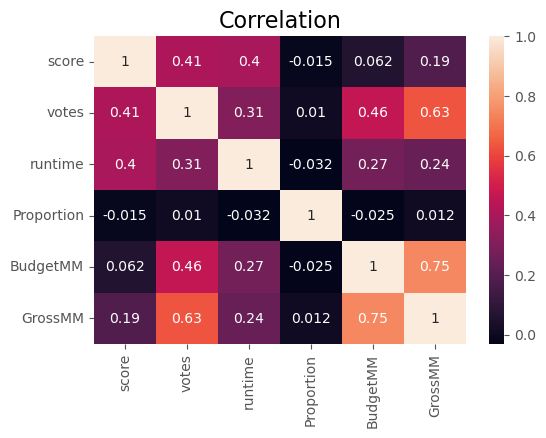

In [67]:
plt.figure(figsize=(6,4))

sns.heatmap(Matrix, annot=True)

plt.title('Correlation', size = 16)

plt.show

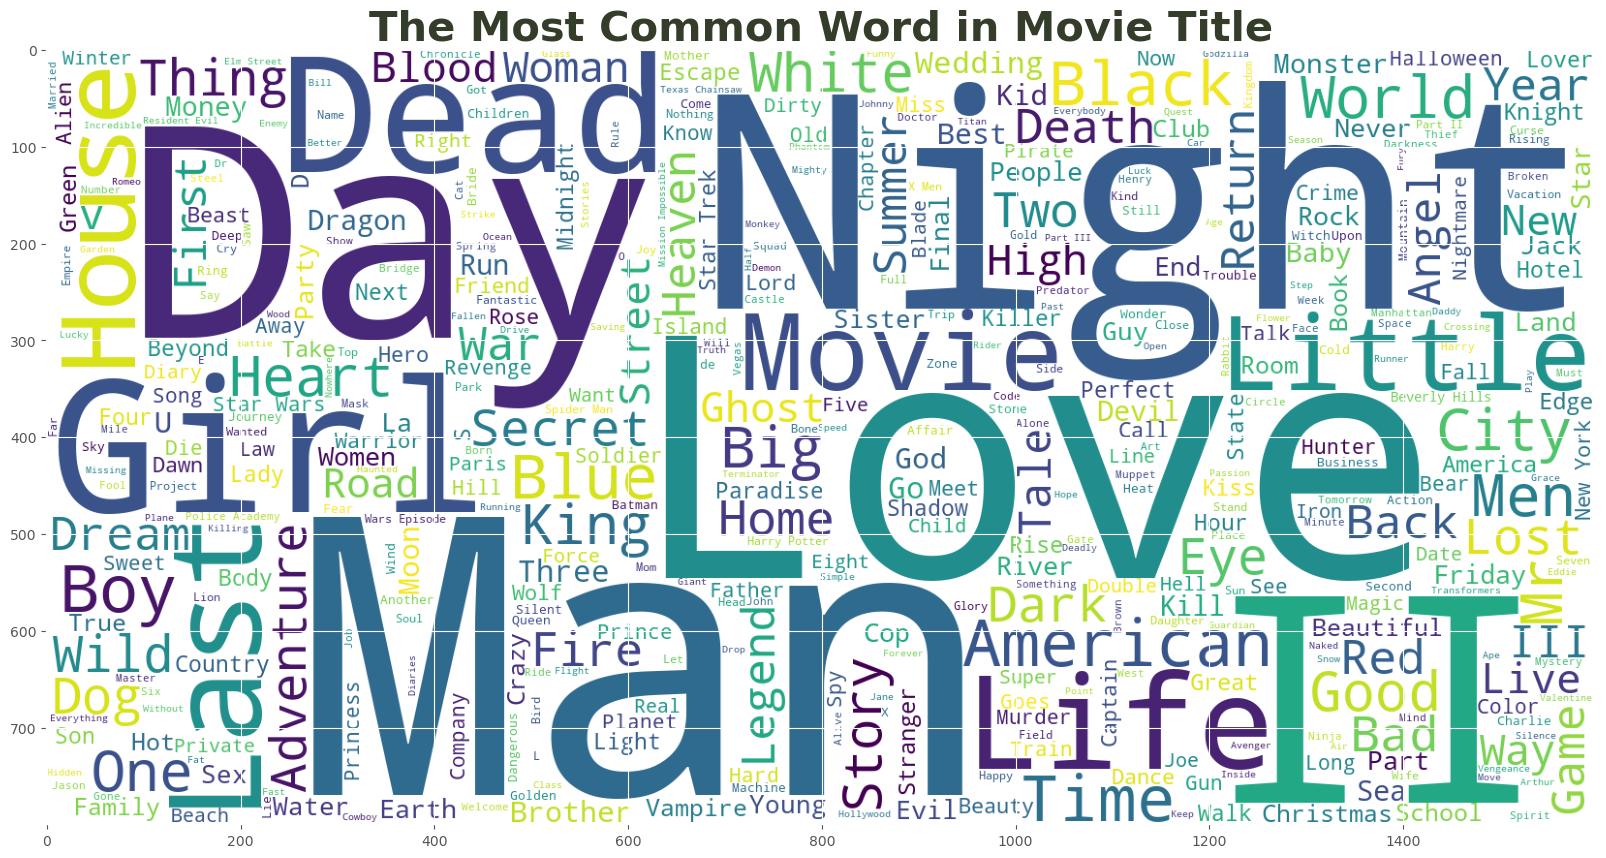

In [68]:
#from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Movie Title', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(df['name']))

plt.imshow(wc)